In [1]:
# importing libraries
import pandas as pd                   # for data manipulation
import seaborn as sns                 # for data visualisation
import matplotlib.pyplot as plt       # for data visualisation
from sklearn.model_selection import train_test_split           # for splitting the dataset
from sklearn.preprocessing import StandardScaler               # for scaling the dataset
from sklearn.metrics import r2_score                           # accuracy measure for the model
from sklearn.linear_model import LinearRegression              # Linear Regression model
from sklearn.metrics import mean_squared_error                 # accuracy measure for the model
import numpy as np                                             # for mathematical operations 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

For the linear regression model, the target variable is "Player Cost USD".

## Reading the dataset

In [2]:
# reading the cleaned dataset
df = pd.read_csv("Clean_Data.csv")

# displaying the dataframe
df.head()

,Is Captain(1=yes),Is Wktkeeper(1=Yes),Nationality(1=Overseas),Team,IPL 4 Franchise,Player cost USD,matches,innings played,no,runs scored,...,half_centuries_ipl,fours_ipl,sixes_ipl,matches_bowl_ipl,balls_bowled_ipl,total_runs_given_ipl,wickets_taken_ipl,bowling_avg_ipl,economy_ipl,3wickets_ipl
0,0.0,0.0,1,Australia,Mumbai Indians,20000.0,40.0,40.0,3.0,817.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,South Africa,Royal Challengers Bangalore,20000.0,18.0,18.0,1.0,356.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,Australia,Kings XI Punjab,20000.0,23.0,8.0,5.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,South Africa,Royal Challengers Bangalore,20000.0,20.0,20.0,0.0,343.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,South Africa,Delhi Daredevils,20000.0,25.0,22.0,8.0,213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation Heatmap

<AxesSubplot:>

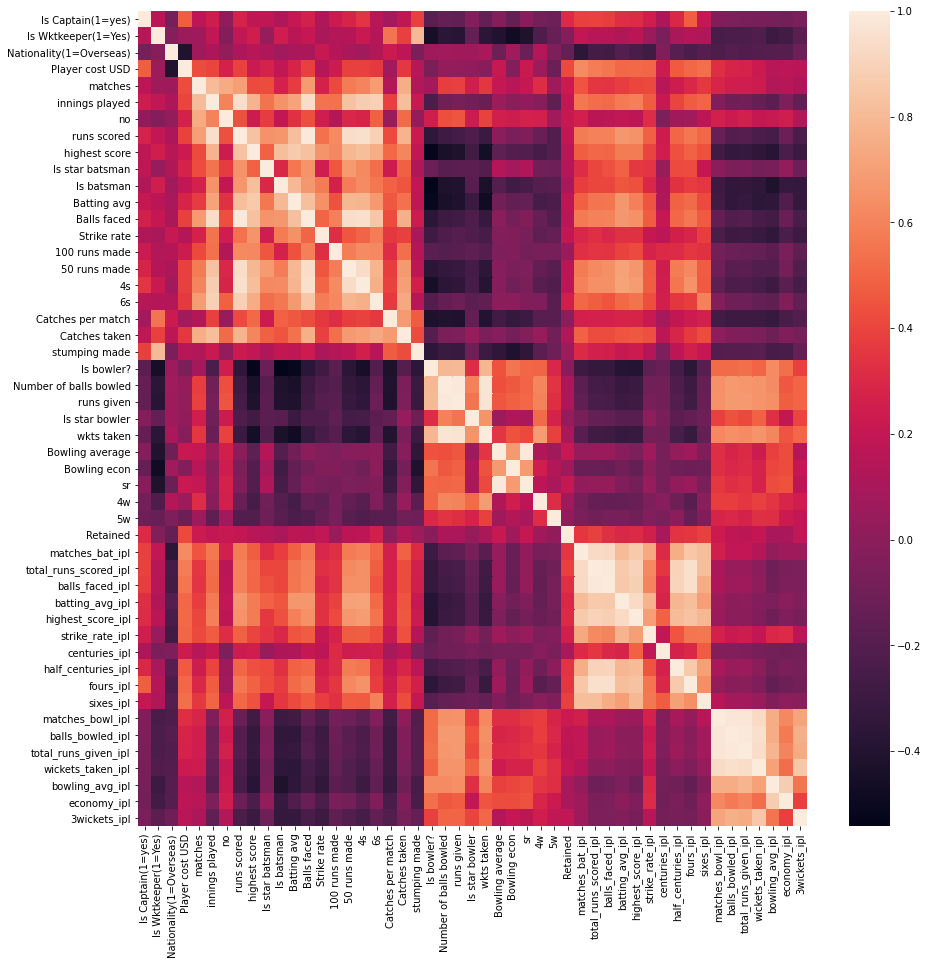

In [3]:
# specifying the figure size of the plot
plt.figure(figsize=(15, 15))

# plotting the heatmap
sns.heatmap(df.corr())

The target variable shares a moderate significant correlation value with only few of the variables like 'matches_bat_ipl', 'total_runs_scored_ipl', etc.

## Preprocessing the dataset

In [4]:
# one hot encoding the categorical variables with multiple categories
data = pd.get_dummies(df, columns=['Team', 'IPL 4 Franchise'])

In [5]:
# shape of the dataframe
data.shape

(129, 68)

In [6]:
data.columns

Index(['Is Captain(1=yes)', 'Is Wktkeeper(1=Yes)', 'Nationality(1=Overseas)',
       'Player cost USD', 'matches', 'innings played', 'no', 'runs scored',
       'highest score', 'Is star batsman', 'Is batsman', 'Batting avg',
       'Balls faced', 'Strike rate', '100 runs made', '50 runs made', '4s',
       '6s', 'Catches per match', 'Catches taken', 'stumping made',
       'Is bowler?', 'Number of balls bowled', 'runs given', 'Is star bowler',
       'wkts taken', 'Bowling average', 'Bowling econ', 'sr', '4w', '5w',
       'Retained', 'matches_bat_ipl', 'total_runs_scored_ipl',
       'balls_faced_ipl', 'batting_avg_ipl', 'highest_score_ipl',
       'strike_rate_ipl', 'centuries_ipl', 'half_centuries_ipl', 'fours_ipl',
       'sixes_ipl', 'matches_bowl_ipl', 'balls_bowled_ipl',
       'total_runs_given_ipl', 'wickets_taken_ipl', 'bowling_avg_ipl',
       'economy_ipl', '3wickets_ipl', 'Team_Australia', 'Team_Bangladesh',
       'Team_England', 'Team_India', 'Team_Netherlands', 'Team_N

In [12]:
# making the target and predictor dataframes
X = data.drop('Player cost USD', axis=1)
y = data['Player cost USD']

In [13]:
# printing the shapes of the target and predictor dataframes
print(X.shape)
print(y.shape)

(129, 67)
(129,)


In [14]:
y

0        20000.0
1        20000.0
2        20000.0
3        20000.0
4        20000.0
         ...    
124    1900000.0
125    2000000.0
126    2100000.0
127    2100000.0
128    2400000.0
Name: Player cost USD, Length: 129, dtype: float64

In [9]:
# storing the predictor variable names to be used later 
cols = X.columns

## Scaling and Splitting

In [15]:
# scaling the variables
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(np.array(y).reshape(-1, 1))

In [17]:
X[0]

array([-0.28988552, -0.36273813,  0.76980036, -0.89519161, -0.30074073,
       -1.06482497, -0.21017582,  0.74098358, -0.44095855,  0.67040152,
        0.11282486, -0.34955847,  1.36968313, -0.40440899, -0.52591768,
        0.26577671, -0.23293425,  0.22862799, -0.54750376, -0.28886651,
       -1.23669388, -1.06446459, -1.0789597 , -0.38959686, -1.04260135,
       -1.32784239,  1.23900783, -1.39599675, -0.6168809 , -0.35899621,
       -0.32025631, -0.91655287, -0.67084335, -0.70110046, -0.94453662,
       -0.83673312, -1.23304101, -0.17888544, -0.49834449, -0.59794914,
       -0.55250839, -0.72567821, -0.68140716, -0.69522571, -0.64595605,
       -0.89301793, -0.89441656, -0.47809144,  1.70560573, -0.08838835,
       -0.23953507, -0.76980036, -0.08838835, -0.23953507, -0.42835294,
       -0.27386128, -0.15430335, -0.40269363, -0.33476703, -0.37628835,
       -0.30532006, -0.34891135, -0.30532006,  3.122499  , -0.33476703,
       -0.23953507, -0.34891135])

In [16]:
y.shape

(129, 1)

In [11]:
y

array([[-1.04087012],
       [-1.04087012],
       [-1.04087012],
       [-1.04087012],
       [-1.04087012],
       [-1.04087012],
       [-0.98657483],
       [-0.98657483],
       [-0.98657483],
       [-0.98657483],
       [-0.98657483],
       [-0.94132876],
       [-0.93227955],
       [-0.93227955],
       [-0.93227955],
       [-0.93227955],
       [-0.92323033],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.89608269],
       [-0.87798426],
       [-0.85988583],
       [-0.8417874 ],
       [-0.82368897],
       [-0.80559054],
       [-0.80559054],
       [-0.80559054],
       [-0.78749211],
       [-0.73319683],
       [-0.7150984 ],
       [-0.7150984 ],
       [-0.7150984 ],
       [-0.7150984 ],
       [-0.69699997],
       [-0.64270468],
       [-0.62460625],
       [-0.62460625],
       [-0.58840939],
       [-0

In [18]:
# splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Baseline Model

In [19]:
# finding the baseline predictions
y_pred_bl = np.repeat(np.mean(y_train), len(y_test))

In [23]:
y_pred_bl

array([0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805, 0.03628805,
       0.03628805, 0.03628805, 0.03628805, 0.03628805])

In [22]:
# finding the metrics for the Baseline model
mean_squared_error(y_test, y_pred_bl)

0.9285636773921593

In [24]:
# finding the metrics for the Baseline model
r2_score(y_test, y_pred_bl)

-0.015760026342164668

## Linear Regression Model 1 - All variables

In [25]:
# initialising the model 
model = LinearRegression()

In [26]:
# fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# finding predictions for the test set
y_pred_lr = model.predict(X_test)

In [28]:
# finding the metrics
mean_squared_error(y_test, y_pred_lr)

1.205207911302471

In [29]:
# finding the metrics 
r2_score(y_test, y_pred_lr)

-0.3183824109623956

This model is even worse than the baseline model. 

The feature importances of each of the variables in the model is plotted to understand which of the predictors might have some influence over the target variable.

# Finetuning with RFE

In [31]:
# define the method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)

# fit the data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
# summarize all features
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (cols[i], rfe.support_[i], rfe.ranking_[i]))

Column: Is Captain(1=yes), Selected True, Rank: 1.000
Column: Is Wktkeeper(1=Yes), Selected False, Rank: 7.000
Column: Nationality(1=Overseas), Selected False, Rank: 16.000
Column: matches, Selected False, Rank: 15.000
Column: innings played, Selected False, Rank: 5.000
Column: no, Selected False, Rank: 27.000
Column: runs scored, Selected True, Rank: 1.000
Column: highest score, Selected False, Rank: 32.000
Column: Is star batsman, Selected False, Rank: 17.000
Column: Is batsman, Selected False, Rank: 43.000
Column: Batting avg, Selected False, Rank: 18.000
Column: Balls faced, Selected True, Rank: 1.000
Column: Strike rate, Selected False, Rank: 33.000
Column: 100 runs made, Selected False, Rank: 36.000
Column: 50 runs made, Selected False, Rank: 44.000
Column: 4s, Selected True, Rank: 1.000
Column: 6s, Selected True, Rank: 1.000
Column: Catches per match, Selected False, Rank: 39.000
Column: Catches taken, Selected False, Rank: 38.000
Column: stumping made, Selected False, Rank: 6.0

In [33]:
# initialise empty list to store the predictors
variables = []

In [34]:
# filtering out the variables which had a high coefficient value
for i in range(len(cols)):
    if rfe.support_[i] == True:
        variables.append(cols[i])

In [35]:
# displaying the variables
print(variables)

['Is Captain(1=yes)', 'runs scored', 'Balls faced', '4s', '6s', 'Number of balls bowled', 'runs given', 'Bowling average', 'sr', 'matches_bat_ipl', 'balls_faced_ipl', 'half_centuries_ipl', 'matches_bowl_ipl', 'total_runs_given_ipl', 'wickets_taken_ipl']


In [36]:
# there are 15 such variables
len(variables)

15

## Linear Regression Model 2 - 15 variables selected using RFE

In [37]:
# making the predictor and target dataframes
X1 = data[variables]
y1 = data['Player cost USD']

In [38]:
# scaling the predictor variables
X1 = StandardScaler().fit_transform(X1)
y1 = StandardScaler().fit_transform(np.array(y1).reshape(-1, 1))

In [39]:
# splitting into train and test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [40]:
# initialising the model 
model1 = LinearRegression()

In [41]:
# fitting the model
model1.fit(X_train1, y_train1)

LinearRegression()

In [42]:
# finding predictions for the test set
y_pred_lr1 = model1.predict(X_test1)

In [43]:
# finding the metrics
mean_squared_error(y_test1, y_pred_lr1)

0.4730937943566677

In [44]:
# finding the metrics
r2_score(y_test1, y_pred_lr1)

0.4824805484879059

In [49]:
y_pred_lr1

array([[ 0.04531956],
       [ 0.09308429],
       [-0.74180249],
       [-0.37632088],
       [ 0.88533739],
       [-0.02646064],
       [ 0.95458274],
       [-0.31389413],
       [ 0.25632927],
       [ 0.08213079],
       [ 2.0546575 ],
       [-0.90850313],
       [-0.34778027],
       [-0.67672313],
       [ 0.47771748],
       [ 0.25215937],
       [ 0.33372865],
       [-0.67832387],
       [ 0.60510942],
       [-0.42492165],
       [-0.66888149],
       [-0.60924003],
       [ 1.61681612],
       [-0.71123933],
       [ 1.06453999],
       [-0.76155446],
       [-0.37035203],
       [ 0.34786662],
       [-0.53897703],
       [-0.99756975],
       [-0.12871552],
       [-0.57771077],
       [ 1.09917603],
       [-0.51576544],
       [-0.11476931],
       [-0.40217707],
       [-0.06155636],
       [-0.72009374],
       [ 0.09465046]])

## Inverse transform

In [46]:
y1 = data['Player cost USD']

In [48]:
scaler = StandardScaler().fit(np.array(y1).reshape(-1, 1))

In [51]:
#scaler.inverse_transform(y_pred_lr1)

# Finetuning using Random Forests

Feature: Is Captain(1=yes), Score: 0.09843
Feature: Is Wktkeeper(1=Yes), Score: 0.00014
Feature: Nationality(1=Overseas), Score: 0.02368
Feature: matches, Score: 0.01617
Feature: innings played, Score: 0.00923
Feature: no, Score: 0.03184
Feature: runs scored, Score: 0.01430
Feature: highest score, Score: 0.00844
Feature: Is star batsman, Score: 0.00346
Feature: Is batsman, Score: 0.00005
Feature: Batting avg, Score: 0.03326
Feature: Balls faced, Score: 0.00900
Feature: Strike rate, Score: 0.01122
Feature: 100 runs made, Score: 0.00131
Feature: 50 runs made, Score: 0.00911
Feature: 4s, Score: 0.01937
Feature: 6s, Score: 0.00538
Feature: Catches per match, Score: 0.02142
Feature: Catches taken, Score: 0.02746
Feature: stumping made, Score: 0.00120
Feature: Is bowler?, Score: 0.00081
Feature: Number of balls bowled, Score: 0.00648
Feature: runs given, Score: 0.00531
Feature: Is star bowler, Score: 0.00055
Feature: wkts taken, Score: 0.00455
Feature: Bowling average, Score: 0.01733
Feature

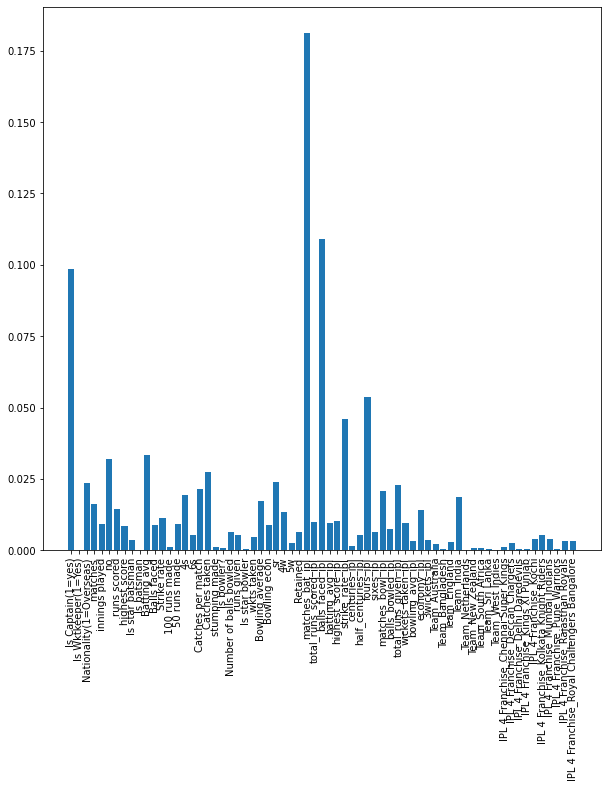

In [52]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train.reshape(-1))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (cols[i],v))
# plot feature importance
plt.figure(figsize=(10, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.show()

In [53]:
# initialise empty list to store the predictors
variables = []

In [54]:
# filtering out the variables which had a high coefficient value
for i in range(len(cols)):
    if importance[i] >= 0.02:
        variables.append(cols[i])

In [55]:
print(variables)

['Is Captain(1=yes)', 'Nationality(1=Overseas)', 'no', 'Batting avg', 'Catches per match', 'Catches taken', 'sr', 'matches_bat_ipl', 'balls_faced_ipl', 'strike_rate_ipl', 'fours_ipl', 'matches_bowl_ipl', 'total_runs_given_ipl']


In [56]:
len(variables)

13

## Linear Regression Model 3 - variables selected using Random Forest

In [57]:
# making the predictor and target dataframes
X1 = data[variables]
y1 = data['Player cost USD']

In [58]:
# scaling the predictor variables
X1 = StandardScaler().fit_transform(X1)
y1 = StandardScaler().fit_transform(np.array(y1).reshape(-1, 1))

In [59]:
# splitting into train and test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [60]:
# initialising the model 
model1 = LinearRegression()

In [61]:
# fitting the model
model1.fit(X_train1, y_train1)

LinearRegression()

In [62]:
# finding predictions for the test set
y_pred_lr1 = model1.predict(X_test1)

In [63]:
# finding the metrics
mean_squared_error(y_test1, y_pred_lr1)

0.45705592633108466

In [64]:
# finding the metrics
r2_score(y_test1, y_pred_lr1)

0.5000244452014733